In [1]:
import pandas as pd
import torch
import torch.nn as nn
device  = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
# Load the CSV files into pandas DataFrames
english_df = pd.read_csv('english_bible.csv') 
igala_df = pd.read_csv('igala_bible.csv')

# Convert columns to consistent types (if needed)
english_df['Book'] = english_df['Book'].astype(str)
english_df['Chapter'] = english_df['Chapter'].astype(int)
english_df['Verse'] = english_df['Verse'].astype(int)

igala_df['Book'] = igala_df['Book'].astype(str)
igala_df['Chapter'] = igala_df['Chapter'].astype(int)
igala_df['Verse'] = igala_df['Verse'].astype(int)

# Merge the DataFrames based on "Book", "Chapter", and "Verse"
merged_df = pd.merge(english_df, igala_df, on=['Book', 'Chapter', 'Verse'], how='left')

# Rename the "Text" columns for clarity
merged_df = merged_df.rename(columns={'Text_x': 'English_Text', 'Text_y': 'Igala_Text'})

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_bible.csv', index=False, encoding='utf-8')

cuda


In [2]:
import pandas as pd
from collections import Counter

# Load the merged CSV file
df = pd.read_csv('merged_bible.csv')

# Combine all Igala text into a single string
igala_text = ' '.join(df['Igala_Text'].dropna()) 

# Tokenize the text (split into words)
words = igala_text.lower().split()

# Calculate word frequencies
word_counts = Counter(words)

# Print the 1000 most frequent words
print(word_counts.most_common(10)) 

[('ma', 23376), ('i', 14373), ('ki', 13615), ('ku', 12502), ('la', 10338), ('oñ', 10050), ('kpai', 9440), ('le̩', 9038), ('kʼi', 8822), ('ñw', 8809)]


In [3]:
import pandas as pd

# Load the CSV file into a pandas DataFrame 
df = pd.read_csv('merged_bible.csv') 

# Drop the specified columns
df = df.drop(['Book', 'Chapter', 'Verse'], axis=1)

# Save the modified DataFrame to a new CSV file
df.to_csv('bible_text_only.csv', index=False) 

In [4]:
dd = pd.read_csv('bible_text_only.csv')

In [5]:
dd


,English_Text,Igala_Text
0,In the beginning God created the heaven and th...,E̩gba abakwane̩ ejodudu O̩jo̩ nyi efojale kpai...
1,"And the earth was without form, and void; and ...","Ane̩-ile̩-i la de̩ juguu te̩ ofofo, oñ e̩chubi..."
2,"And God said, Let there be light: and there wa...","Oñ O̩jo̩ kakini, Ugane̩ ki do̩mo̩; tak ugane̩ ..."
3,"And God saw the light, that",O̩jo̩ la fʼugane̩ le̩ li kʼi nyo̩; tak O̩jo̩ f...
4,"And God called the light Day, and the darkness...","O̩jo̩ la do̩ ugane̩ le̩ ko̩ o̩ro̩ka, e̩chubi i..."
...,...,...
31075,"And the Spirit and the bride say, Come. And le...","TʼAfu, tʼo̩ya-etito̩ le̩ kakini, Lewa. E̩ne̩ k..."
31076,For I testify unto every man that heareth the ...,Omi agbibenu ñw e̩ne̩ du ki agbo̩ o̩la ache̩-e...
31077,and if any man shall take away from the words ...,i la che̩wñ kʼe̩ne̩ du muchi kwef o̩la ibuku a...
31078,"He which testifieth these things saith,","E̩ne̩ ki gbigbenu e̩wñ-i kakini, I-i; nawa pio..."


In [7]:
import pandas as pd

# 1. Load the CSV file into a Pandas DataFrame
df = pd.read_csv('bible_text_only.csv')

# 2. Convert the DataFrame to JSONL
with open('bible_data.jsonl', 'w', encoding='utf-8') as jsonl_file:
    for index, row in df.iterrows():
        data = {
            "English_Text": row["English_Text"],
            "Igala_Text": row["Igala_Text"]
        }
        jsonl_file.write(f"{data}\n")

In [13]:
# # This is a CONCEPTUAL example and may need 
# # to be adapted based on the Gemini API.

# from google.gemini import GeminiClient 

# # 1. Initialize the Gemini client
# gemini_client = GeminiClient() 

# # 2. Prepare your training data (adjust path and format as needed)
# training_data = "path/to/your/training_data.jsonl"

# # 3. Define fine-tuning parameters (refer to Gemini documentation)
# training_config = {
#     "model": "gemini-pro", # Replace with the desired model
#     # ... other parameters like learning_rate, batch_size, etc.
# }

# # 4. Start the fine-tuning job
# job = gemini_client.fine_tune(
#     training_data=training_data,
#     training_config=training_config
# )

# # 5. Monitor the job (optional)
# job.monitor() 

# # 6. Save and use the fine-tuned model
# # (Follow instructions from Gemini documentation)

ModuleNotFoundError: No module named 'google.gemini'

In [12]:
import pandas as pd

# 1. Load your dataset 
df = pd.read_csv('merged_bible.csv') 

# 2. Combine the text from both language columns
all_text = ' '.join(df['English_Text'].fillna('')) + ' ' + ' '.join(df['Igala_Text'].fillna(''))

# 3. Tokenize the text
words = all_text.lower().split() # You might need more sophisticated tokenization

# 4. Create the vocabulary (set ensures unique words)
vocabulary = sorted(set(words)) 

# 5. Add special tokens 
vocabulary = ['<pad>', '<unk>', '<start>', '<end>'] + vocabulary # Common special tokens

# 6. Save the vocabulary to vocab.txt
with open('vocab.txt', 'w', encoding='utf-8') as f:
    for word in vocabulary:
        f.write(word + '\n')

print(f"Vocabulary size: {len(vocabulary)}")
print("Vocabulary saved to 'vocab.txt'")

Vocabulary size: 64129
Vocabulary saved to 'vocab.txt'


In [14]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # ... (Load and split the data as before)

# def save_to_txt(df, filename):
#     """Saves the 'English_Text' and 'Igala_Text' columns to a TXT file, 
#        handling missing values.
#     """
#     with open(filename, 'w', encoding='utf-8') as f:
#         for index, row in df.iterrows():
#             english_text = str(row['English_Text']) if not pd.isna(row['English_Text']) else ""
#             igala_text = str(row['Igala_Text']) if not pd.isna(row['Igala_Text']) else ""
#             f.write(english_text + '\t' + igala_text + '\n')

# save_to_txt(train_df, 'train.txt')
# save_to_txt(val_df, 'validation.txt')

In [5]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
import nltk
# nltk.download('punkt')


# Load the merged CSV file
df = pd.read_csv('merged_bible.csv')

# Combine all Igala text into a single string
igala_text = ' '.join(df['Igala_Text'].dropna()) 

# Tokenize the text (split into words)
words = word_tokenize(igala_text.lower())

# Calculate word frequencies
word_counts = Counter(words)

# Function to generate n-grams
def generate_ngrams(text, n):
    tokens = word_tokenize(text)
    ngrams = nltk.ngrams(tokens, n)
    return [' '.join(gram) for gram in ngrams]

# Generate 2-word phrases (bigrams) and calculate their frequencies
phrases = generate_ngrams(igala_text, 2)
phrase_counts = Counter(phrases)

# Print the 10 most frequent phrases
print(phrase_counts.most_common(1000))


[('ku ma', 9445), ('kakini ,', 6899), (', oñ', 3824), (', i', 3300), ('. Tak', 3297), ('n ,', 3252), ('. Oñ', 2775), ('le̩ ,', 2410), ('oñ i', 2371), ('ñw u', 1924), ('ku me̩', 1911), (', ma', 1872), (', kpai', 1734), ('. Taku', 1715), ('ka ñw', 1703), (', kʼi', 1524), (', owñ', 1499), ('ñwu ma', 1478), ('n ;', 1452), ('oñ ma', 1439), ('le̩ .', 1428), ('i la', 1348), ('ma la', 1282), ('ka ñwu', 1249), ('; oñ', 1228), (', ku', 1220), ('. I', 1219), ('Tak i', 1153), ('; todu', 1137), (', todu', 1114), ('Jihofa ,', 935), ('ma ,', 913), (', tak', 901), ('Oñ i', 887), ('abo ku', 883), (', kʼe̩', 868), ('; i', 848), (', o̩ma', 840), (', me̩', 828), ('u kakini', 827), ('ma kakini', 822), ('tak i', 800), ('. Todu', 797), ('du ki', 788), ('go ,', 785), ('ñw e̩', 779), ('i kakini', 764), ('; tak', 747), ('du ku', 737), ('je̩ ñw', 726), ('ñwu mi', 712), ('me̩ ,', 710), ('ki Jihofa', 699), (', kakini', 698), (', e̩', 689), ('I la', 675), ('ñwu me̩', 674), ('le̩ ;', 670), ('i ka', 655), ('n ?', 653

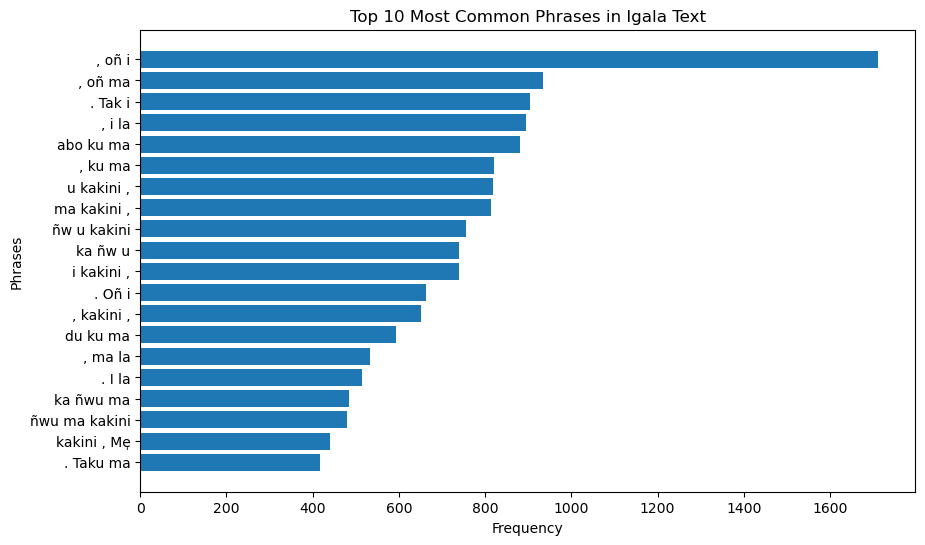

In [4]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Load the merged CSV file
df = pd.read_csv('merged_bible.csv')

# Combine all Igala text into a single string
igala_text = ' '.join(df['Igala_Text'].dropna()) 

# Tokenize the text (split into words)
words = word_tokenize(igala_text.lower())

# Calculate word frequencies
word_counts = Counter(words)

# Function to generate n-grams
def generate_ngrams(text, n):
    tokens = word_tokenize(text)
    ngrams = nltk.ngrams(tokens, n)
    return [' '.join(gram) for gram in ngrams]

# Generate 2-word phrases (bigrams) and calculate their frequencies
phrases = generate_ngrams(igala_text, 3)
phrase_counts = Counter(phrases)

# Extract the most common phrases and their frequencies
top_phrases = phrase_counts.most_common(20)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.barh([phrase[0] for phrase in top_phrases], [phrase[1] for phrase in top_phrases])
plt.xlabel('Frequency')
plt.ylabel('Phrases')
plt.title('Top 10 Most Common Phrases in Igala Text')
plt.gca().invert_yaxis()  # Invert y-axis to have the most common phrase at the top
plt.show()


In [3]:
import torch

if torch.cuda.is_available():
    print("CUDA is available.")
    print(f"Number of CUDA devices: {torch.cuda.device_count()}")
    print(f"Current CUDA device: {torch.cuda.current_device()}")
    print(f"Device name: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("CUDA is not available.")


CUDA is available.
Number of CUDA devices: 1
Current CUDA device: 0
Device name: NVIDIA GeForce RTX 3060 Laptop GPU
